In [51]:
import pandas as pd
#import names of parameters from the excel file 
#and store them in a list called param_names
param_names = pd.read_excel('results/Supporting_information/Metamodel_RD/InputOutputData.xlsx')
# find "description" in the first row of the excel file and select that row
param_names = param_names.loc[param_names.iloc[:,0] == 'Description'].reset_index(drop=True)
# then traspose it to get the names of the parameters
param_names = param_names.T
# remove the first row
param_names = param_names.iloc[1:].reset_index(drop=True)

In [53]:
#Import Sobol sensitivity indices from excel files
#For resource depletion
sobol_indices_RD = pd.read_excel("results/Supporting_information/Metamodel_RD/test3b_SensIndHDMR.xlsx")
# Find "Total effect" in the first column and select the next 23 rows
total_effect_index = sobol_indices_RD[sobol_indices_RD.iloc[:, 0] == "Total effects"].index[0]
sobol_indices_RD = sobol_indices_RD.loc[total_effect_index:total_effect_index + 23]
#Select second and third column and drop first row
sobol_indices_RD = sobol_indices_RD.iloc[:, 1:3]
sobol_indices_RD = sobol_indices_RD.drop(sobol_indices_RD.index[0]).reset_index(drop=True)
#Name first column parameter and second column RD sensitivity index
sobol_indices_RD.columns = ["Parameter", "Mineral resource depletion"]

In [59]:
#For climate change
sobol_indices_CC = pd.read_excel("results/Supporting_information/Metamodel_CC/test3b_SensIndHDMR.xlsx")
# Find "Total effect" in the first column and select the next 23 rows
total_effect_index = sobol_indices_CC[sobol_indices_CC.iloc[:, 0] == "Total effects"].index[0]
sobol_indices_CC = sobol_indices_CC.loc[total_effect_index:total_effect_index + 23]
#Select second and third column and drop first row
sobol_indices_CC = sobol_indices_CC.iloc[:, 1:3]
sobol_indices_CC = sobol_indices_CC.drop(sobol_indices_CC.index[0]).reset_index(drop=True)
#Name first column parameter and second column CC sensitivity index
sobol_indices_CC.columns = ["Parameter", "Climate change"]


In [60]:
# substitute first column of the sensitivity indices with the names of the parameters
sobol_indices_RD["Parameter"] = param_names
sobol_indices_CC["Parameter"] = param_names
#merge the two dataframes on the parameter column
sobol_indices = pd.merge(sobol_indices_RD, sobol_indices_CC, on="Parameter")

In [61]:
# Modify the Parameter column
sobol_indices['Parameter'] = sobol_indices['Parameter'].str.replace('_', ' ')
sobol_indices['Parameter'] = sobol_indices['Parameter'].str.replace('LT', 'Lifetime')
sobol_indices['Parameter'] = sobol_indices['Parameter'].str.replace('rec', 'recovery')
sobol_indices['Parameter'] = sobol_indices['Parameter'].str.replace('Elec', 'Electricity use')
sobol_indices['Parameter'] = sobol_indices['Parameter'].str.replace('Siem', 'Siemens process')
sobol_indices['Parameter'] = sobol_indices['Parameter'].str.replace('PR', 'Performance ratio')
sobol_indices['Parameter'] = sobol_indices['Parameter'].str.replace('Eff', 'Efficiency')
sobol_indices['Parameter'] = sobol_indices['Parameter'].str.replace('CZ', 'Czochralski process')
sobol_indices['Parameter'] = sobol_indices['Parameter'].str.replace('Zeol scrub', 'Hazardous gas abatement')

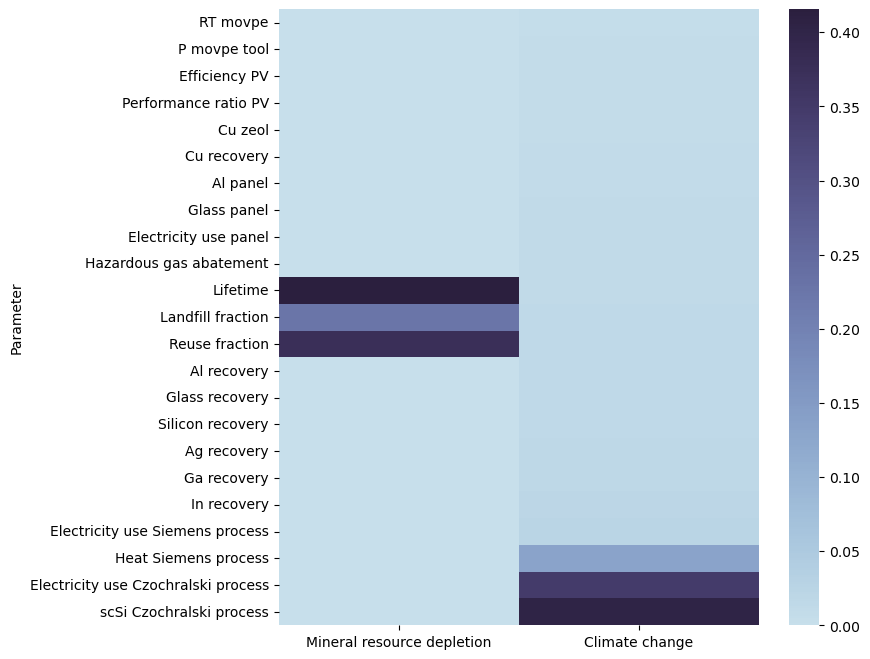

In [62]:
#Plot in heatmap
import seaborn as sns
import matplotlib.pyplot as plt
# Set the style of seaborn
blue=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)

# Plot in heatmap using the custom color palette
plt.figure(figsize=(10, 8))
sns.heatmap(sobol_indices.set_index("Parameter"), annot=False, cmap=blue, linewidths=.5, linecolor=None)
plt.subplots_adjust(left=0.3, right=0.9)  # Adjust the left margin to add space
plt.show()

In [68]:
#import data from the excel file, ignore first 10 rows and first column
#for resource depletion
#empty dataframe with two columns "Original" and "Predicted"
inputoutput_RD = pd.DataFrame(columns=["Original", "Predicted"])
#read the two sheets from the excel file
inputoutput_RD["Original"] = pd.read_excel('results/Supporting_information/Metamodel_RD/InputOutputDataTest.xlsx', sheet_name='OutputDataTestOrig1', skiprows=10, usecols="B")
inputoutput_RD["Predicted"] = pd.read_excel('results/Supporting_information/Metamodel_RD/InputOutputDataTest.xlsx', sheet_name='OutputDataTestPred1', skiprows=10, usecols="B")
#For climate change
#empty dataframe with two columns "Original" and "Predicted"
inputoutput_CC = pd.DataFrame(columns=["Original", "Predicted"])
#read the two sheets from the excel file
inputoutput_CC["Original"] = pd.read_excel('results/Supporting_information/Metamodel_CC/InputOutputDataTest.xlsx', sheet_name='OutputDataTestOrig1', skiprows=10, usecols="B")
inputoutput_CC["Predicted"] = pd.read_excel('results/Supporting_information/Metamodel_CC/InputOutputDataTest.xlsx', sheet_name='OutputDataTestPred1', skiprows=10, usecols="B")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


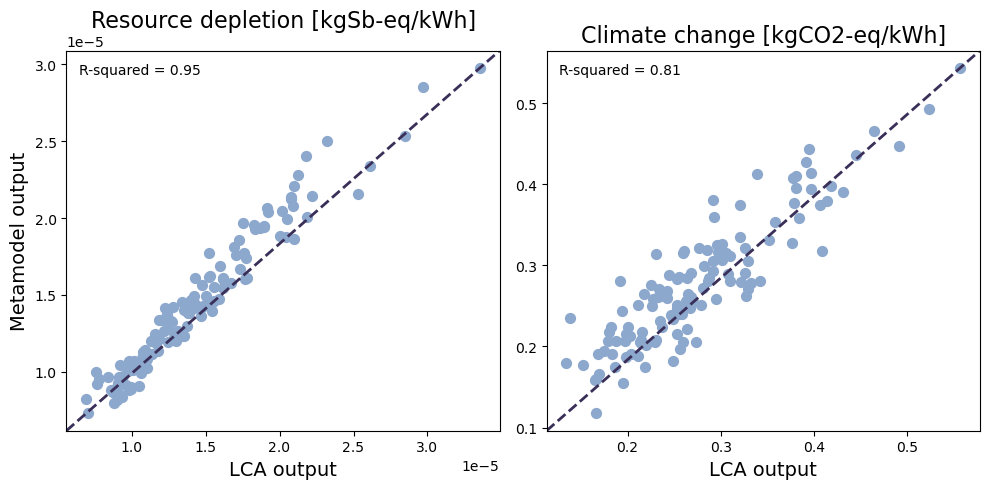

In [72]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Set colors
color1 = blue(0.3) 
color2 = blue(0.9)

# Plot LCA output vs metamodel predicted output for resource depletion
axes[0].scatter(inputoutput_RD["Original"], inputoutput_RD["Predicted"], color=color1, s=50, marker="o")
correlation_RD = inputoutput_RD["Original"].corr(inputoutput_RD["Predicted"])
R2_RD = correlation_RD**2
axes[0].plot([0, 1], [0, 1], color=color2, linestyle="--", linewidth=2, transform=axes[0].transAxes)
axes[0].set_title("Resource depletion [kgSb-eq/kWh]", fontsize=16)
axes[0].set_xlabel("LCA output", fontsize=14)
axes[0].set_ylabel("Metamodel output", fontsize=14)
axes[0].legend(title=f"R-squared = {R2_RD:.2f}", frameon=False)

# Plot LCA output vs metamodel predicted output for climate change
axes[1].scatter(inputoutput_CC["Original"], inputoutput_CC["Predicted"], color=color1, s=50, marker="o")
correlation_CC = inputoutput_CC["Original"].corr(inputoutput_CC["Predicted"])
R2_CC = correlation_CC**2
axes[1].plot([0, 1], [0, 1], color=color2, linestyle="--", linewidth=2, transform=axes[1].transAxes)
axes[1].set_title("Climate change [kgCO2-eq/kWh]", fontsize=16)
axes[1].set_xlabel("LCA output", fontsize=14)
axes[1].legend(title=f"R-squared = {R2_CC:.2f}", frameon=False)


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()